The dataset hr_data.csv contains samples of candidates that were part of a recruitment process of a particular client of ScaleneWorks. ScaleneWorks supports several information technology (IT) companieswith their talent acquisition. 

One of the challenge they face is about 30% of the candidates who  accept the jobs offer, do not join the company. This leads to huge loss of revenue and time as the companies initiate the recruitment process again to fill the workforce demand. ScaleneWorks wants to find out  if a model can be built to predict the likelihood of a candidate not joining the company. If the likelihood is  high, then the company will not offer the jobs to the candidates.


# Import the liabraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn import preprocessing
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Train test split function
from sklearn.model_selection import train_test_split

## Importing the liabrary to run the regression model
import statsmodels.api as sm

## Importing the liabrary to view the diagnostic summaries of the model
import sklearn.metrics as metrics


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('C:\\Users\\arora\\Documents\\UT\\Introduction to Machine Learning\\Group Project\\Raw Data Group Project.csv')
df.head(10)
df.shape
df_exploration = df

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location Enc,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,A,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,B,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,A,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,A,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,A,34,Joined
5,6,2117167,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,A,34,Joined
6,7,2119124,Yes,37,30,E2,31.58,31.58,0.00,No,No,Male,Employee Referral,7,INFRA,A,32,Joined
7,9,2127572,Yes,16,0,E1,-20.00,-20.00,0.00,No,No,Female,Direct,8,Healthcare,A,34,Joined
8,11,2138169,No,1,30,E1,-22.22,-22.22,0.00,No,No,Female,Employee Referral,3,BFSI,C,26,Joined
9,12,2143362,No,6,30,E1,240.00,220.00,-5.88,No,No,Male,Employee Referral,3,CSMP,B,34,Joined


(8995, 18)

In [4]:
df.dtypes

SLNO                             int64
Candidate Ref                    int64
DOJ Extended                    object
Duration to accept offer         int64
Notice period                    int64
Offered band                    object
Pecent hike expected in CTC    float64
Percent hike offered in CTC    float64
Percent difference CTC         float64
Joining Bonus                   object
Candidate relocate actual       object
Gender                          object
Candidate Source                object
Rex in Yrs                       int64
LOB                             object
Location Enc                    object
Age                              int64
Status                          object
dtype: object

Datatype for all the variables looks consitent with the understanding. 

Checking if there are any missing values in the data

In [5]:
df.isna().apply(sum, axis = 0)

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location Enc                   0
Age                            0
Status                         0
dtype: int64

Data seems to be clean with no missing values in any column

Some Folks expected a decrease in CTC. Lets see how many of these folks are

In [6]:
df.loc[df['Pecent hike expected in CTC']<0].shape

(140, 18)

In [7]:
df.columns

Index(['SLNO', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location Enc', 'Age',
       'Status'],
      dtype='object')

<AxesSubplot:xlabel='Rex in Yrs', ylabel='Density'>

<AxesSubplot:xlabel='Rex in Yrs', ylabel='Density'>

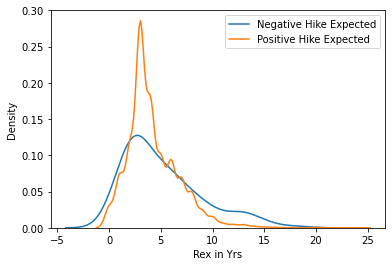

In [8]:
## One obvious thing that comes to mind is baby they are trying to switch industries, and have relatively lower
## work experience. So, they are willing to take a paycut as well. Lets assess how true is it. 
sn.kdeplot(df.loc[df['Pecent hike expected in CTC']<0].loc[:,'Rex in Yrs'], label = 'Negative Hike Expected')
sn.kdeplot(df.loc[df['Pecent hike expected in CTC']>0].loc[:,'Rex in Yrs'], label = 'Positive Hike Expected')
plt.legend()

## Doesn't seem to be very different for bot the cases. Let's leave them as is since their quantum is very low

We are interested in finding the probability people who will not join the team. Lets check if our dataset has sufficient data to predict it. i.e. we want to ensure that the class is balanced. 

In [9]:
df['Status'].value_counts(normalize = True)
df['Status'].value_counts()

Joined        0.813007
Not Joined    0.186993
Name: Status, dtype: float64

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

~20% of the data belongs to not joined. The class is not very imbalanced and can be worked upon as is. We can add a patch later to see if oversampling from this field adds value or not. 

## Encoding the variables

In [10]:
# Data cleaning

#SLNO is just the index, which pandas automatically has. Cadidate Ref is 
# catagorical, but has hundreds of possible values, and would drown out our other features if one-hot-encoded

df = df.drop(labels = ['SLNO', 'Candidate Ref'], axis=1)

# Convert binary values to 0 and 1
def convert_to_binary(column):
  unique_vals = column.unique()
  if len(unique_vals) != 2: #this function is only for columns with 2 possible values
    print('This column has more than 2 values')
    return column
  encoded_vals = []
  for val in column:
    if val == unique_vals[0]:
      encoded_vals.append(0)
    elif val == unique_vals[1]:
      encoded_vals.append(1)
    else:
      print('Something went wrong')
      return column #should never happen
  return pd.Series(encoded_vals)

columns_to_convert_to_binary = ['Gender', 'DOJ Extended', 'Joining Bonus', 'Candidate relocate actual','Status']
for col in columns_to_convert_to_binary:
  df[col] = convert_to_binary(df[col])


# Standardize numerical values
def standardize_column(column):
  return (column-column.min())/(column.max()-column.min())

# not all numerical values should be standardized, some should be transformed in other ways, come back to this
columns_to_standardize = ['Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age']
for col in columns_to_standardize:
  df[col] = standardize_column(df[col])


# One hot encode categorical columns
categorical_columns = ['Offered band', 'Candidate Source', 'LOB', 'Location Enc']
for col in categorical_columns:
  encoded = pd.get_dummies(df[col],prefix = str(col), drop_first=True)
  df = df.join(encoded)
  df = df.drop(col, axis=1)
df.head(5)
df.shape

,DOJ Extended,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Rex in Yrs,Age,Status,Offered band_E1,Offered band_E2,Offered band_E3,Candidate Source_Direct,Candidate Source_Employee Referral,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,Location Enc_B,Location Enc_C,Location Enc_D,Location Enc_E,Location Enc_F,Location Enc_G,Location Enc_H,Location Enc_I,Location Enc_J,Location Enc_K
0,0,0.062500,0.250,0.112086,0.138525,0.299861,0,0,0,0.291667,0.350,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.080357,0.250,0.277252,0.715336,0.673265,0,0,1,0.333333,0.350,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,1,0.013393,0.375,0.260546,0.194319,0.183162,0,0,1,0.166667,0.175,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.116071,0.250,0.260546,0.194319,0.183162,0,0,1,0.166667,0.350,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.004464,1.000,0.259963,0.193849,0.183162,0,1,1,0.250000,0.350,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


(8995, 35)

In [12]:
x= df.corrwith(df['Status']).sort_values(ascending = False)
x

Status                                1.000000
Notice period                         0.192119
Duration to accept offer              0.065446
LOB_BFSI                              0.059813
LOB_ERS                               0.049698
Location Enc_D                        0.046887
Location Enc_B                        0.044812
LOB_EAS                               0.040475
Rex in Yrs                            0.037716
Location Enc_E                        0.016774
Gender                                0.012851
Location Enc_F                        0.011698
DOJ Extended                          0.006102
Offered band_E2                       0.005631
Joining Bonus                         0.004101
Location Enc_H                        0.004009
Location Enc_C                        0.001577
Pecent hike expected in CTC           0.000290
Offered band_E1                      -0.000103
Location Enc_K                       -0.001347
LOB_CSMP                             -0.001474
LOB_Healthcar

From correlation, there does not seem to be a highly +/- relationship with either variable.  

Let's explore the data  to assess any differentiation

### Gender 

We can see that our dataset has ~80% male and 20% female data

<AxesSubplot:>

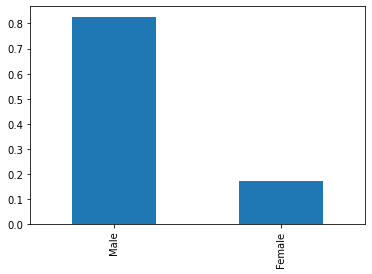

In [13]:
df_exploration['Gender'].value_counts(normalize = True).plot(kind = 'bar')

### Joining Bonus

~8% of people in the dataset were offered a joining bonus

<AxesSubplot:>

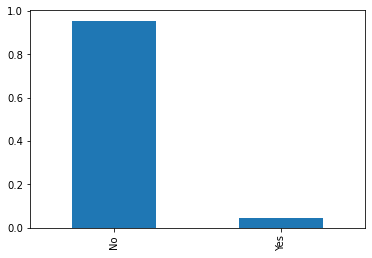

In [14]:
df_exploration['Joining Bonus'].value_counts(normalize = True).plot(kind = 'bar')

### Candidate Relocation

~12% of candidates had to relocate to join. This indicates that the data has more local candidates who were offered the job 

<AxesSubplot:>

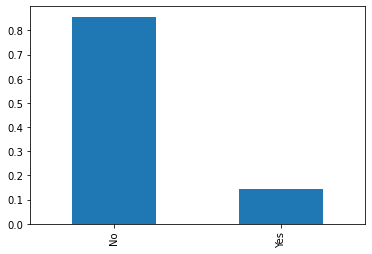

In [15]:
df_exploration['Candidate relocate actual'].value_counts(normalize = True).plot(kind = 'bar')

### Source

More than 50% of candidates that are rolled out offers belong to direct channel 

<AxesSubplot:>

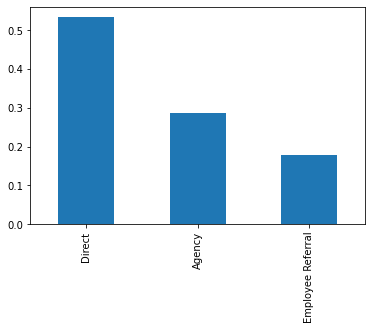

In [16]:
df_exploration['Candidate Source'].value_counts(normalize = True).plot(kind = 'bar')

### Location

~90% of the offers are rolled out for three cities --> B,A, and D 

<AxesSubplot:>

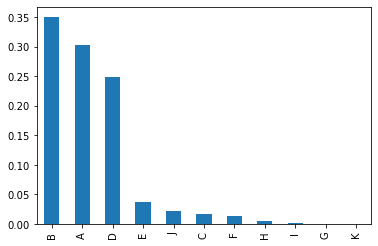

In [17]:
df_exploration['Location Enc'].value_counts(normalize = True).plot(kind = 'bar')

## Let's look at their interation with the variable of interest

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Gender'>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='DOJ Extended'>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Joining Bonus'>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Candidate relocate actual'>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Offered band'>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Candidate Source'>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='LOB'>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Location Enc'>

<Figure size 720x576 with 0 Axes>

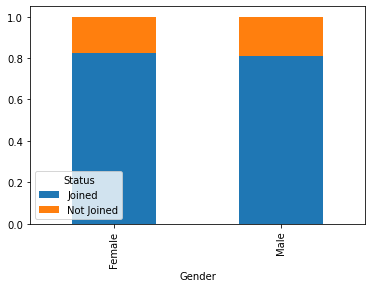

<Figure size 720x576 with 0 Axes>

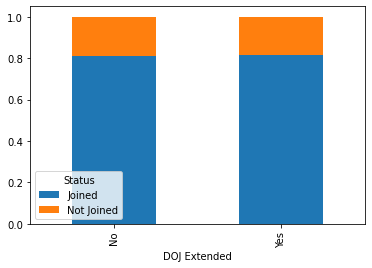

<Figure size 720x576 with 0 Axes>

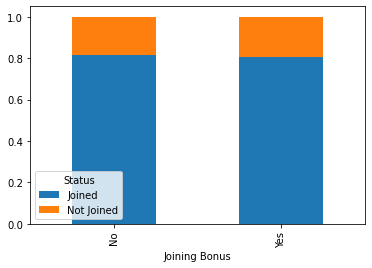

<Figure size 720x576 with 0 Axes>

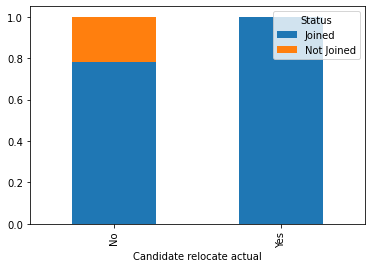

<Figure size 720x576 with 0 Axes>

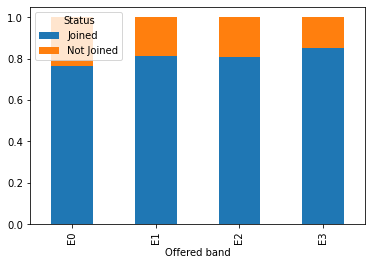

<Figure size 720x576 with 0 Axes>

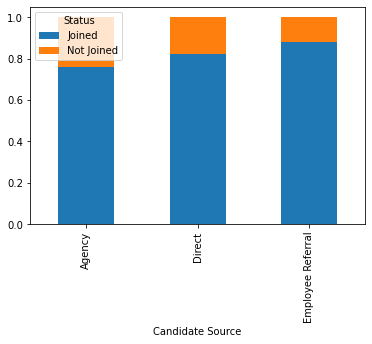

<Figure size 720x576 with 0 Axes>

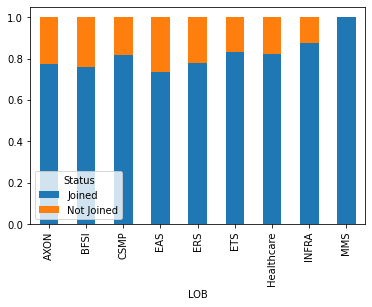

<Figure size 720x576 with 0 Axes>

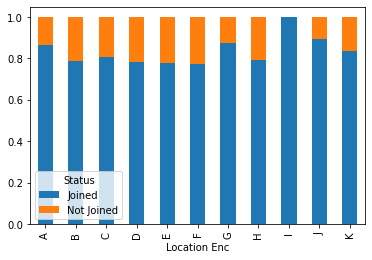

In [18]:
# Binary columns
for x in ['Gender', 'DOJ Extended', 'Joining Bonus', 'Candidate relocate actual','Offered band', 'Candidate Source', 'LOB', 'Location Enc']:
    plt.figure(figsize = (10,8))
    pd.crosstab(df_exploration[x] , df_exploration['Status']  , normalize='index').plot(kind = 'bar' , stacked='True')

<B>Location</B>:The % of people who did not join differ by Location

<B>LOB </B> : The % of people who did not join differ by Location

<B>Candidate Source </B> The % of people who did not join differ by source

<B>Offered Band </B> The % of people who did not join differ by Offered Band as well

<B>Candidate Relocation </B> The % of people who did not join differ by whther they had to relocate for the job or not

## Visualizing continuous variables against the variable of interest

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Pecent hike expected in CTC', ylabel='Density'>

<AxesSubplot:xlabel='Pecent hike expected in CTC', ylabel='Density'>

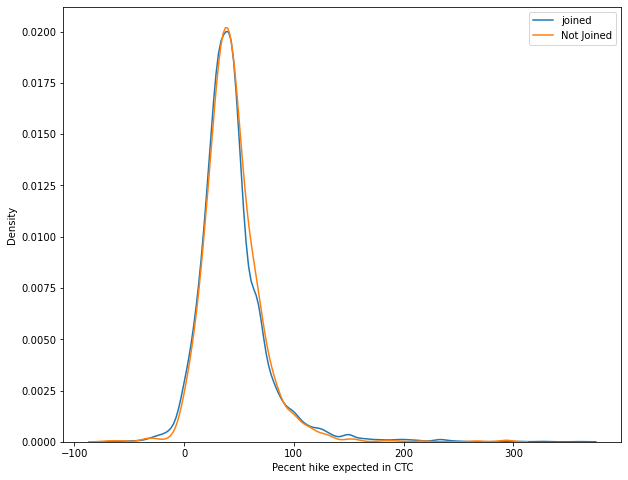

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Percent hike offered in CTC', ylabel='Density'>

<AxesSubplot:xlabel='Percent hike offered in CTC', ylabel='Density'>

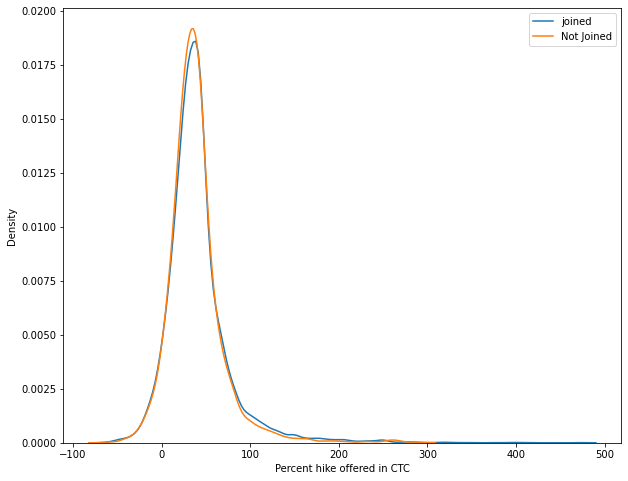

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Notice period', ylabel='Density'>

<AxesSubplot:xlabel='Notice period', ylabel='Density'>

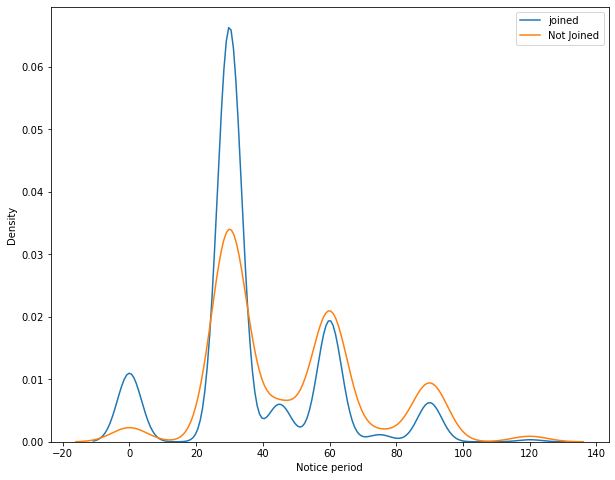

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Percent difference CTC', ylabel='Density'>

<AxesSubplot:xlabel='Percent difference CTC', ylabel='Density'>

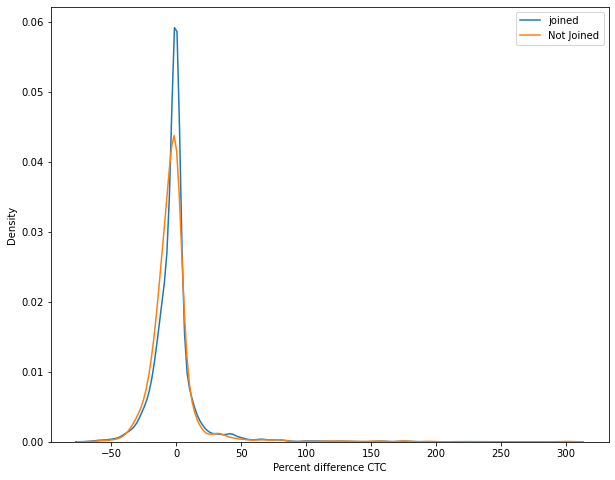

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Rex in Yrs', ylabel='Density'>

<AxesSubplot:xlabel='Rex in Yrs', ylabel='Density'>

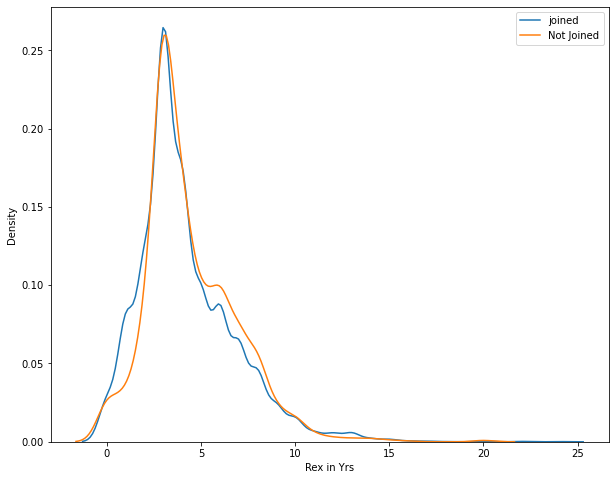

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Age', ylabel='Density'>

<AxesSubplot:xlabel='Age', ylabel='Density'>

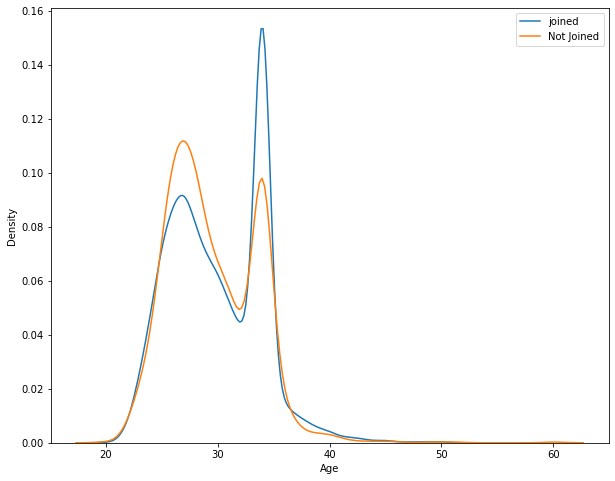

In [19]:
for x in ['Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Notice period', 'Percent difference CTC', 'Rex in Yrs', 'Age']:
    plt.figure(figsize = (10,8))
    sn.kdeplot(df_exploration.loc[df_exploration['Status']=='Joined',x], label='joined')
    sn.kdeplot(df_exploration.loc[df_exploration['Status']=='Not Joined',x], label = 'Not Joined')
    plt.legend()
    plt.show()

1. joining Bonus intuitively yes but visually not impactful
2. Candidate relocation visual impact
3. offered band : Little visually
4. Candidate Source: Visually yes
5. LOB : visually Yes
6. Location Enc : Visually Yes
7. % difference in Exp vs offered should matter

### Well, We have seen the associativity of a lot of variables with our variable of concern. Let's check if they are related to each other. This will help us later to analyze our results 

VIF: To check interdependence of X variables 

There are quite a few variables that are related with each other. For example: Percent difference CTC can be derives from the Percent hike offered in CTC and Pecent hike expected in CTC	

In [20]:
## Checking the VIFs to assess dependence of all X variables
## Now, we have a lot of variabls, we will need to select important features
## Let's check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df_int = df.drop(['Status'], axis = 1)
## Creating and storing in a dataframe
vif_df = pd.DataFrame({ 'columns': vif_df_int.columns,
                          'VIF': [variance_inflation_factor(vif_df_int.to_numpy() , i) for i in range(len(vif_df_int.columns))]
                      })
vif_df.sort_values('VIF' , ascending= False).head(10)
#correlated_features = vif_df.loc[vif_df['VIF']>4, 'columns'].tolist()


,columns,VIF
4,Percent hike offered in CTC,89.863423
3,Pecent hike expected in CTC,86.352169
5,Percent difference CTC,61.328099
11,Offered band_E1,28.395527
12,Offered band_E2,17.013143
9,Rex in Yrs,11.508476
10,Age,10.649903
22,LOB_INFRA,7.269334
8,Gender,6.072501
19,LOB_ERS,6.015991


Dropping highly correlated variables from the model 

In [21]:
drop_cols = ['Percent hike offered in CTC', 'Pecent hike expected in CTC']

In [22]:
model_df_cols_dropped = df.drop(drop_cols, axis = 1)

# Splitting the dataset into test and train 

In [23]:
ind = model_df_cols_dropped.drop("Status", axis = 1)
dep = model_df_cols_dropped.loc[:,"Status"]

# Lets develop some predictive models

### Logistic Regression

Logistic regression is the most basic classification algorithm

In [24]:
## Splitting the data into dependent and independent variables first
ind = model_df_cols_dropped.drop("Status", axis = 1)
dep = model_df_cols_dropped['Status']

## Creating train and test dataframes
train_x , test_x , train_y , test_y = train_test_split(ind , dep, train_size = 0.7 , random_state = 12)

for x in [train_x , test_x , train_y , test_y]:
    x.shape
train_x.head(2)
test_x.shape

(6296, 32)

(2699, 32)

(6296,)

(2699,)

,DOJ Extended,Duration to accept offer,Notice period,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Rex in Yrs,Age,Offered band_E1,Offered band_E2,Offered band_E3,Candidate Source_Direct,Candidate Source_Employee Referral,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,Location Enc_B,Location Enc_C,Location Enc_D,Location Enc_E,Location Enc_F,Location Enc_G,Location Enc_H,Location Enc_I,Location Enc_J,Location Enc_K
4633,1,0.026786,0.25,0.155145,0,0,1,0.125,0.20,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7396,0,0.272321,0.50,0.183162,0,0,0,0.125,0.35,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


(2699, 32)

In [25]:
from sklearn.model_selection import KFold
logreg = LogisticRegression(max_iter=3000)
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
score = cross_val_score(estimator=logreg,X=ind, y= dep,cv=kfold,scoring='precision')
print("Precision: %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

Precision: 56.041% (4.944%)


# Lets try to fit it on the train Dataset

In [39]:
logistic_model = logreg.fit(train_x, train_y)
logistic_classification = logistic_model.predict(test_x)
logistic_prob = logistic_model.predict_proba(test_x)
prob_logistic_reg=[]
for x in range(len(list(logistic_prob.flatten()))):
    if x%2 !=0:
        prob_logistic_reg.append(list(logistic_prob.flatten())[x])
prob_logistic_reg[0:2]    

[0.21230321679869696, 0.2599131010552923]

Evaluating the model

In [41]:
logistic_df = pd.DataFrame({
    'actual': test_y,
    'pred' :logistic_classification,
    'pred_prob':prob_logistic_reg
})
## Cutoff is at 0.5
logistic_df.groupby(['pred'])['pred_prob'].min()
pd.crosstab(logistic_df['actual'], logistic_df['pred'])

pred
0    0.000486
1    0.501365
Name: pred_prob, dtype: float64

pred,0,1
actual,,
0,2146,26
1,497,30


In [42]:
print(classification_report(test_y,logistic_classification))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2172
           1       0.54      0.06      0.10       527

    accuracy                           0.81      2699
   macro avg       0.67      0.52      0.50      2699
weighted avg       0.76      0.81      0.74      2699



0.7231204636550752

0.7231204636550752

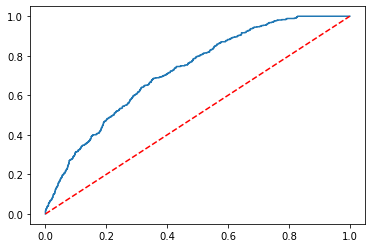

In [46]:
fpr , tpr , threshold = metrics.roc_curve(logistic_df['actual'] , logistic_df['pred_prob'] , drop_intermediate=True)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1] , linestyle = 'dashed' , color ='red')
metrics.auc(fpr,tpr)
metrics.roc_auc_score(logistic_df['actual'] , logistic_df['pred_prob'])
#print(threshold)

# Performing Youden's test 

(array([484], dtype=int64),)


0.20064167945529077


,actual,pred,pred_prob,predicted_category_j_statistic
4271,1,0,0.212303,1
5945,0,0,0.259913,1
1499,0,0,0.004979,0
4681,0,0,0.254522,1
6542,1,1,0.567441,1


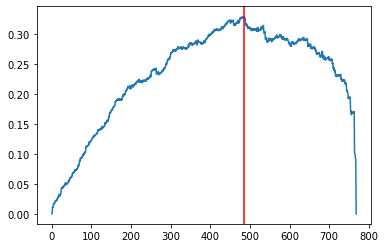

In [50]:
### Since we have the ROC Curve laid out, let's try and see what should be the optimal cutoff
j_st = np.array(tpr) - np.array(fpr)
result = np.where(j_st == max(j_st))
plt.plot(j_st)
print(result)
plt.axvline(result , color='red')

### Let's try to see the threshold at this point
j_st = float(threshold[result])
print(j_st)
## Let's see how does the model improve with this new threshold

logistic_df['predicted_category_j_statistic'] = logistic_df['pred_prob'].apply(lambda x: 1 if x>=j_st else 0)
logistic_df.head(5)

In [52]:
print(classification_report(logistic_df['actual'],logistic_df['predicted_category_j_statistic']))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      2172
           1       0.32      0.69      0.44       527

    accuracy                           0.65      2699
   macro avg       0.61      0.67      0.59      2699
weighted avg       0.78      0.65      0.69      2699



## Changing the cutoff using Youden's index improves the recall for our class to ~70%. We obviously have to take a hit on the metrics for class : 0 

Lets see if training the data on the oversampled dataset helps us improve the model further

In [133]:
#Increase the proportion of minority class using Synthetic Minority oversampling technique

## Importing the liabrary for SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0)
os_data_x,os_data_y= os.fit_resample(ind, dep)

In [134]:
print(os_data_x.shape)
print(os_data_y.shape)
os_data_y.value_counts()

(14626, 32)
(14626,)


0    7313
1    7313
Name: Status, dtype: int64

# Lets create a parallel dataset that undersamples from the majority dataset

In [135]:
# https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
from imblearn.under_sampling import NearMiss
from collections import Counter
undersample = NearMiss(version=1, n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(ind, dep)
Counter(y)
## We can see that now we have 50% contribution from each class

Counter({0: 1682, 1: 1682})

# Selecting where do you want to run models -- OS/US

In [137]:
os_data_x = os_data_x 
os_data_y = os_data_y
Counter(os_data_y)

Counter({0: 7313, 1: 7313})

Fitting the model again

In [162]:
logreg = LogisticRegression(max_iter=3000)
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
for x in ["precision", "recall","f1","roc_auc" ,"accuracy"]:
    score = cross_val_score(estimator=logreg,X=os_data_x, y= os_data_y,cv=kfold,scoring=x)
    print(x+ ": %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

precision: 66.536% (1.253%)
recall: 75.841% (0.877%)
f1: 70.872% (0.632%)
roc_auc: 75.781% (0.235%)
accuracy: 68.836% (0.619%)



1. we can see that overall performance metrics of the model have increased 

2. Also, Using K folds CV, we have made sure that the variation is not very huge. The performance metrices are more or less consistent

### We can now train the model using the training set from this new dataset

In [163]:
## Creating train and test dataframes
train_x_os , test_x_os , train_y_os , test_y_os = train_test_split(os_data_x , os_data_y, train_size = 0.7 , random_state = 12)

for x in [train_x_os , test_x_os , train_y_os , test_y_os]:
    x.shape
train_x.head(2)

(10238, 32)

(4388, 32)

(10238,)

(4388,)

,DOJ Extended,Duration to accept offer,Notice period,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Rex in Yrs,Age,Offered band_E1,Offered band_E2,Offered band_E3,Candidate Source_Direct,Candidate Source_Employee Referral,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,Location Enc_B,Location Enc_C,Location Enc_D,Location Enc_E,Location Enc_F,Location Enc_G,Location Enc_H,Location Enc_I,Location Enc_J,Location Enc_K
4633,1,0.026786,0.25,0.155145,0,0,1,0.125,0.20,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7396,0,0.272321,0.50,0.183162,0,0,0,0.125,0.35,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [164]:
logistic_model_new = logreg.fit(train_x_os, train_y_os)
logistic_classification = logistic_model_new.predict(test_x_os)

In [165]:
logistic_df = pd.DataFrame({
    'actual': test_y_os,
    'pred' :logistic_classification
})
pd.crosstab(logistic_df['actual'], logistic_df['pred'])

pred,0,1
actual,,
0,1293,829
1,574,1692


In [166]:
print(classification_report(test_y_os,logistic_classification))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65      2122
           1       0.67      0.75      0.71      2266

    accuracy                           0.68      4388
   macro avg       0.68      0.68      0.68      4388
weighted avg       0.68      0.68      0.68      4388



## Feature importance through Logistic Regression 

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='Coeff', ylabel='value'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Notice period'),
  Text(1, 0, 'Rex in Yrs'),
  Text(2, 0, 'Gender'),
  Text(3, 0, 'DOJ Extended'),
  Text(4, 0, 'Location Enc_B'),
  Text(5, 0, 'Location Enc_K'),
  Text(6, 0, 'Duration to accept offer'),
  Text(7, 0, 'Location Enc_D'),
  Text(8, 0, 'LOB_EAS'),
  Text(9, 0, 'Location Enc_E'),
  Text(10, 0, 'Joining Bonus'),
  Text(11, 0, 'Candidate Source_Direct'),
  Text(12, 0, 'Location Enc_G'),
  Text(13, 0, 'Location Enc_C'),
  Text(14, 0, 'LOB_ERS'),
  Text(15, 0, 'LOB_CSMP'),
  Text(16, 0, 'LOB_BFSI'),
  Text(17, 0, 'Location Enc_F'),
  Text(18, 0, 'Offered band_E2'),
  Text(19, 0, 'Location Enc_J'),
  Text(20, 0, 'LOB_ETS'),
  Text(21, 0, 'Candidate Source_Employee Referral'),
  Text(22, 0, 'Offered band_E1'),
  Text(23, 0, 'Offered band_E3'),
  Text(24, 0, 'LOB_Healthcare'),
  Text(25, 0, 'Location Enc_I'),
  Text(26, 0,

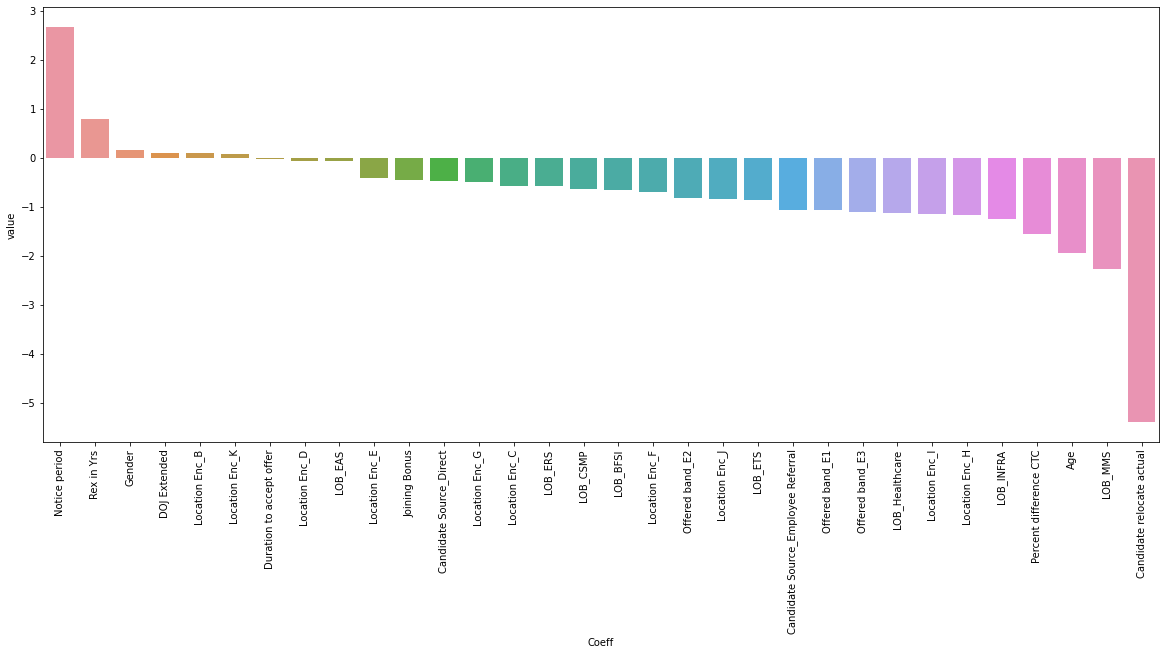

In [167]:
plt.figure(figsize = (20,8))
coeff_df = pd.DataFrame([])
coeff_df['Coeff'] = train_x_os.columns
coeff_df['value'] = logistic_model_new.coef_.flatten()
coeff_df.sort_values(by = 'value', ascending = False , inplace = True)
sn.barplot(x = coeff_df['Coeff'], y = coeff_df['value'])
plt.xticks(rotation = '90')

We can see that the parameters like Notice Period, Relevant work experience positively impacts the  <B>Not Joining</B> probability. Whereas, variables like Candidate has to relocate for the job, and % difference in CTC negatively impacts it. 

# Lets Explore other set of models 

### K Near Neighbours 

In [197]:
## Importing the Classifier
from sklearn.neighbors import KNeighborsClassifier

## Lets use the Grid Search CV to fine tune the value of K
from sklearn.model_selection import GridSearchCV
## Creating the grid parameters to iterate in the model
tuned_parameters = { 'n_neighbors' : range(2,10)
                   }
## Defining an instance of the GridSearchCV method
K_neigh = KNeighborsClassifier()
clf = GridSearchCV(estimator=K_neigh,
             param_grid= tuned_parameters, 
             scoring= 'recall', 
             cv = 10, )

Fitting on the entire raw data (without SMOTE)  

In [195]:
clf.fit(ind, dep)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 10)}, scoring='accuracy')

In [196]:
## Looking at the best fit model
## For the training dataset, it is giving us a recall of 25% which is bad
clf.best_params_
clf.best_score_

{'n_neighbors': 8}

0.808893338277098

In [147]:
## Once we have figured out the best parameters lets try to run the model on train and test data and train data
K_neigh = KNeighborsClassifier(n_neighbors= 3)
K_neigh.fit(train_x, train_y)
K_neigh_predicted = K_neigh.predict(test_x)

KNeighborsClassifier(n_neighbors=3)

In [148]:
print(classification_report(test_y,K_neigh_predicted))
## We can see that K_neighbour works better than logistic on the overall data but these performance 
## metrics are still low

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2172
           1       0.41      0.25      0.31       527

    accuracy                           0.78      2699
   macro avg       0.62      0.58      0.59      2699
weighted avg       0.75      0.78      0.76      2699



## Let's do it for the Over Sampled data 

In [149]:
clf.fit(os_data_x, os_data_y)
clf.best_params_
clf.best_score_

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 10)}, scoring='recall')

{'n_neighbors': 5}

0.9008510686012874

In [150]:
## Once we have figured out the best parameters lets try to run the model on train and test data
K_neigh = KNeighborsClassifier(n_neighbors= 5)
K_neigh.fit(train_x_os, train_y_os)
K_neigh_predicted = K_neigh.predict(test_x_os)

print(classification_report(test_y_os,K_neigh_predicted))


KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.83      0.66      0.73      2122
           1       0.73      0.88      0.80      2266

    accuracy                           0.77      4388
   macro avg       0.78      0.77      0.77      4388
weighted avg       0.78      0.77      0.77      4388



K near neighbours works better than the logistic regression as it improves both the recall and precision of the class 

# Using Decision Tree for Classification  

In [151]:
from sklearn.tree import DecisionTreeClassifier
## Creating the grid parameters to iterate in the model
tuned_parameters = { 'criterion' : ['gini' , 'entropy'] ,
                     'max_depth' : range(2,10),
                     'ccp_alpha' : [0.005,0.01,0.02,0.03,0.04,0.05]
                   }
## Defining an instance of the GridSearchCV method
clf_tree = DecisionTreeClassifier(random_state= 16)
clf = GridSearchCV(estimator=clf_tree,
             param_grid= tuned_parameters, 
             scoring= 'recall', 
             cv = 10)

## Let's fit the model now
clf.fit(os_data_x,os_data_y)
## Looking at the best fit model
clf.best_params_
clf.best_score_

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=16),
             param_grid={'ccp_alpha': [0.005, 0.01, 0.02, 0.03, 0.04, 0.05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10)},
             scoring='recall')

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5}

0.8268690243920671

In [152]:
## We now know the optimal parameters, so we will instance a new model with these parameters
DT_classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth=5,ccp_alpha= 0.01)
DT_classifier.fit(train_x_os,train_y_os)
DTpredition = DT_classifier.predict(test_x_os)  

print(classification_report(test_y_os,DTpredition))

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5)

              precision    recall  f1-score   support

           0       0.74      0.56      0.64      2122
           1       0.66      0.82      0.73      2266

    accuracy                           0.69      4388
   macro avg       0.70      0.69      0.68      4388
weighted avg       0.70      0.69      0.69      4388



In [153]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

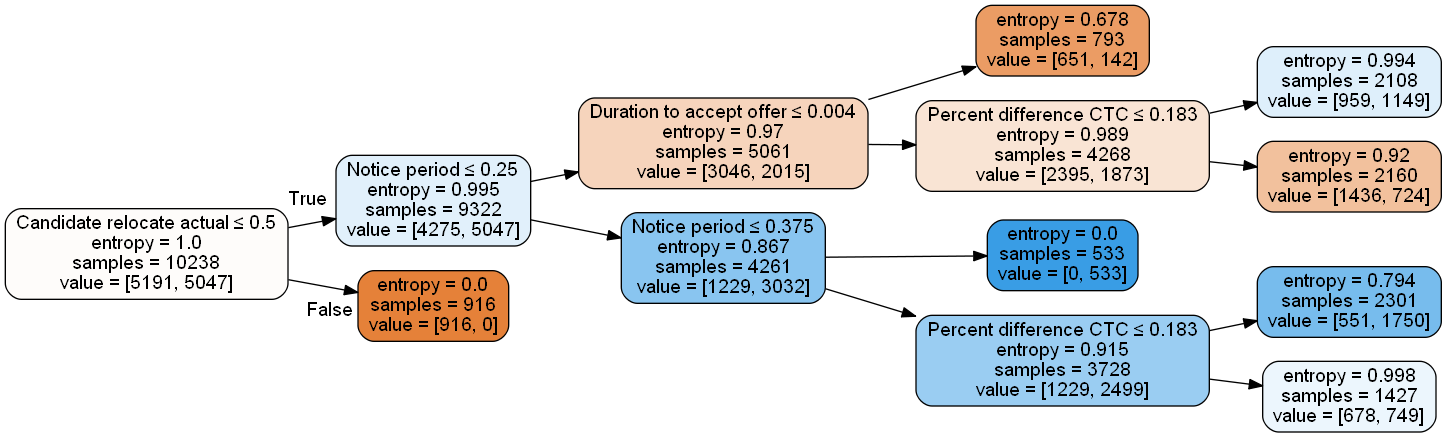

In [154]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names= train_x.columns , rotate = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<Figure size 864x576 with 0 Axes>

<BarContainer object of 32 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

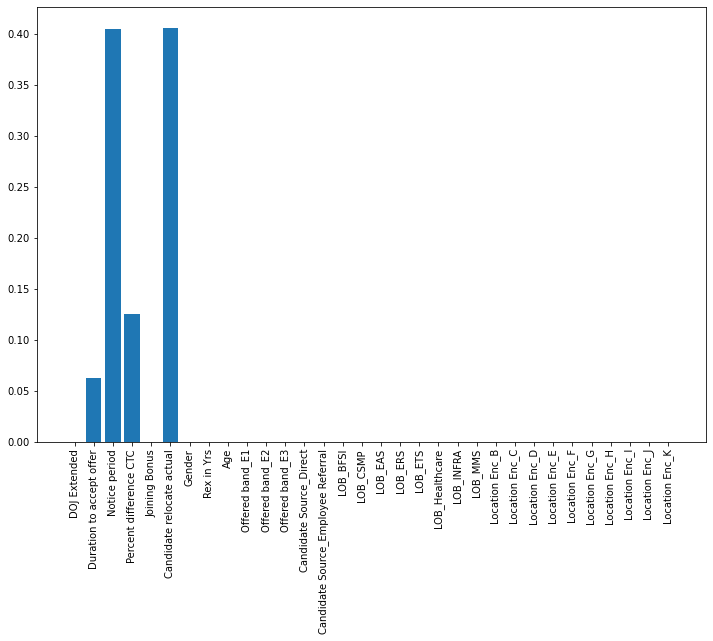

In [156]:
plt.figure(figsize = (12,8))
importance = DT_classifier.feature_importances_
# plot feature importance
plt.bar([x for x in list(os_data_x.columns)], importance)
plt.xticks(rotation=  '90')
plt.show()

# Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

## Creating the grid parameters to iterate in the model
tuned_parameters = { 'criterion' : ['gini'] ,
                     
                    'max_features': [2,3,4,5,6,7, 31],
                    'n_estimators': [200,300,400,500,600,700]
                   }
## Defining an instance of the GridSearchCV method
clf_tree = RandomForestClassifier(random_state= 16)
clf = GridSearchCV(estimator=clf_tree,
             param_grid= tuned_parameters, 
             scoring= 'recall', 
             cv = 10)

## Let's fit the model now
clf.fit(os_data_x,os_data_y)
## Looking at the best fit model
clf.best_params_
clf.best_score_

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=16),
             param_grid={'criterion': ['gini'],
                         'max_features': [2, 3, 4, 5, 6, 7, 31],
                         'n_estimators': [200, 300, 400, 500, 600, 700]},
             scoring='recall')

{'criterion': 'gini', 'max_features': 2, 'n_estimators': 600}

0.884144035044441

In [158]:

## We now know the optimal parameters, so we will instance a new model with these parameters
RF_classifier = RandomForestClassifier(criterion= 'gini',max_features = 2 , n_estimators = 600,random_state=15)
RF_classifier.fit(train_x_os,train_y_os)
RFpredition = RF_classifier.predict(test_x_os)  

print(classification_report(test_y_os,RFpredition))

RandomForestClassifier(max_features=2, n_estimators=600, random_state=15)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2122
           1       0.87      0.88      0.88      2266

    accuracy                           0.87      4388
   macro avg       0.87      0.87      0.87      4388
weighted avg       0.87      0.87      0.87      4388



<Figure size 1080x576 with 0 Axes>

<BarContainer object of 32 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

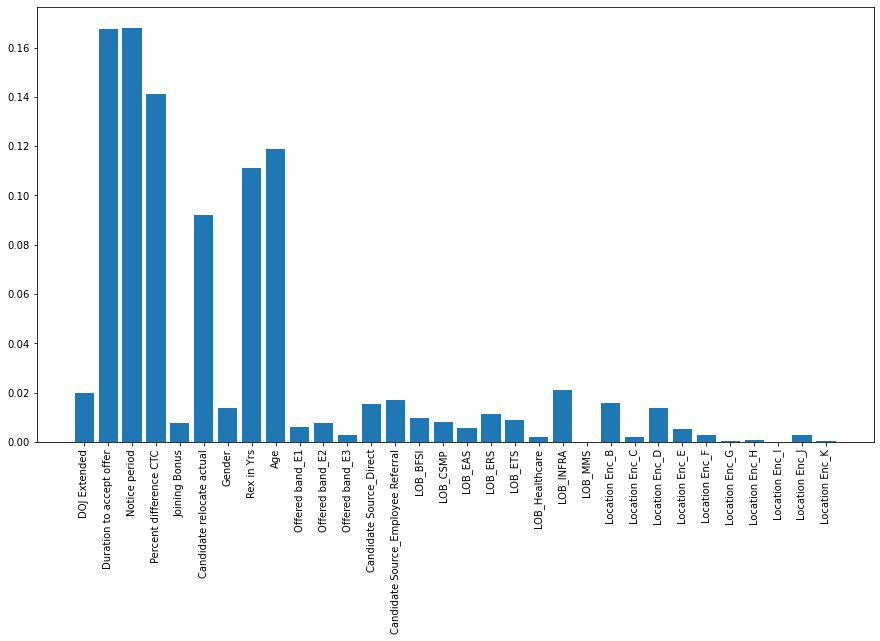

In [160]:
plt.figure(figsize = (15,8))
importance = RF_classifier.feature_importances_
# plot feature importance
plt.bar([x for x in list(os_data_x.columns)], importance)
plt.xticks(rotation=  '90')
plt.show()

# Bagging 

In [159]:
## We now know the optimal parameters, so we will instance a new model with these parameters
RF_classifier = RandomForestClassifier(criterion= 'gini',max_features = 32 , n_estimators = 600,random_state=15)
RF_classifier.fit(train_x_os,train_y_os)
RFpredition = RF_classifier.predict(test_x_os)  

print(classification_report(test_y_os,RFpredition))

RandomForestClassifier(max_features=32, n_estimators=600, random_state=15)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2122
           1       0.88      0.85      0.87      2266

    accuracy                           0.87      4388
   macro avg       0.87      0.87      0.87      4388
weighted avg       0.87      0.87      0.87      4388



<Figure size 1080x576 with 0 Axes>

<BarContainer object of 32 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

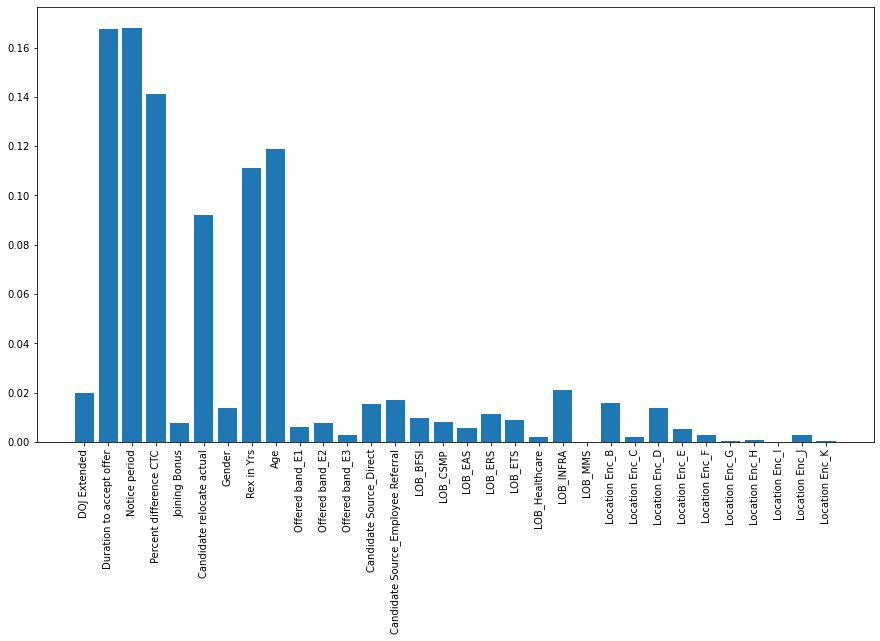

In [161]:
plt.figure(figsize = (15,8))
importance = RF_classifier.feature_importances_
# plot feature importance
plt.bar([x for x in list(os_data_x.columns)], importance)
plt.xticks(rotation=  '90')
plt.show()

# Boosting 

In [193]:
from sklearn.ensemble import AdaBoostClassifier

## Creating the grid parameters to iterate in the model
#3 It takes a lot of time to execute it so I manually fed in the values and see the movement of recall to finally decide the parameters
tuned_parameters = {                      
                    'learning_rate': [0.05],
                    'n_estimators': [700]
                   }
## Defining an instance of the GridSearchCV method
clf_tree = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(criterion= 'gini',max_features=4) ,
                              random_state= 16)
clf = GridSearchCV(estimator=clf_tree,
             param_grid= tuned_parameters, 
             scoring= 'recall', 
             cv = 10)

## Let's fit the model now
clf.fit(os_data_x,os_data_y)
## Looking at the best fit model
clf.best_params_
clf.best_score_

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4),
                                          random_state=16),
             param_grid={'learning_rate': [0.05], 'n_estimators': [700]},
             scoring='recall')

{'learning_rate': 0.05, 'n_estimators': 700}

0.8845570481337788

In [198]:
## We now know the optimal parameters, so we will instance a new model with these parameters
ADABoost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4),
                                          random_state=16, n_estimators=700, learning_rate=0.05)
ADABoost_classifier.fit(train_x_os,train_y_os)
ADABoostpredition = ADABoost_classifier.predict(test_x_os)  

print(classification_report(test_y_os,ADABoostpredition))

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4),
                   learning_rate=0.05, n_estimators=700, random_state=16)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2122
           1       0.89      0.88      0.89      2266

    accuracy                           0.88      4388
   macro avg       0.88      0.88      0.88      4388
weighted avg       0.88      0.88      0.88      4388



<Figure size 1080x576 with 0 Axes>

C:\Users\arora\anaconda3\lib\site-packages\sklearn\tree\_classes.py:600: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


<BarContainer object of 32 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

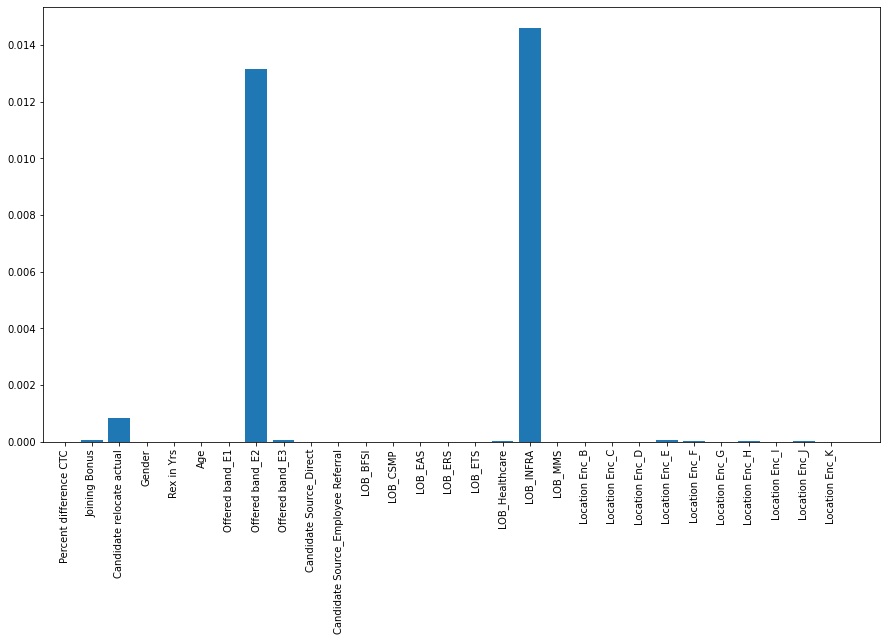

In [199]:
plt.figure(figsize = (15,8))
importance = ADABoost_classifier.feature_importances_
# plot feature importance
plt.bar([x for x in list(os_data_x.columns)], importance)
plt.xticks(rotation=  '90')
plt.show()